In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dense, LSTM, SimpleRNN
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

2023-04-29 11:56:55.110717: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-29 11:56:55.284440: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-04-29 11:56:55.291705: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-04-29 11:56:55.291726: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

In [2]:
dataGreaterthan2003 = pd.read_csv('dataGreaterthan2003_20230313.csv')
dataGreaterthan2003['Unnamed: 0'] = pd.to_datetime(dataGreaterthan2003['Unnamed: 0'])
dataGreaterthan2003.set_index('Unnamed: 0', inplace=True)

In [3]:
test_size = 12

#test sets
rnnTestDF = lstmTestDF = dataGreaterthan2003.tail(12)

# train sets
# get the number of rows in the dataframe
num_rows = dataGreaterthan2003.shape[0]

# get all rows except the last 12 rows
rnnTrainDF = lstmTrainDF = dataGreaterthan2003.iloc[:num_rows-12, :]

In [4]:
rnn_result = pd.read_csv('rnnHyperParameters.csv')
rnn_result.set_index('index', inplace=True)

In [5]:
lstm_result = pd.read_csv('lstmHyperParameters.csv')
lstm_result.set_index('index', inplace=True)

In [6]:
transformer_result = pd.read_csv('transformerHyperParameters.csv')
transformer_result.set_index('index', inplace=True)

In [7]:
transformer_result_dict = transformer_result.to_dict(orient='index')

In [8]:
transformer_result_dict

{'Food Price Index': {'learning_rate': 0.001,
  'epochs': 50,
  'loss': 0.0010676982734973},
 'Headline Consumer Price Index': {'learning_rate': 0.001,
  'epochs': 50,
  'loss': 0.0025134168875714},
 'Official Core Consumer Price Index': {'learning_rate': 0.001,
  'epochs': 50,
  'loss': 0.004173689133798},
 'Petrol': {'learning_rate': 0.001, 'epochs': 50, 'loss': 0.0135074742138385},
 'Producer Price Index': {'learning_rate': 0.001,
  'epochs': 50,
  'loss': 0.0267434585839509},
 'Energy Price Index': {'learning_rate': 0.001,
  'epochs': 50,
  'loss': 0.0323085455844799},
 'Diesel': {'learning_rate': 0.001, 'epochs': 50, 'loss': 0.0327409928043683}}

In [9]:
rnn_result_dict = rnn_result.to_dict(orient='index')

In [10]:
rnn_result_dict

{'Official Core Consumer Price Index': {'learning_rate': 0.1,
  'epochs': 50,
  'loss': 0.0003093353589065},
 'Energy Price Index': {'learning_rate': 0.01,
  'epochs': 100,
  'loss': 0.0133834099397063},
 'Food Price Index': {'learning_rate': 0.01,
  'epochs': 150,
  'loss': 0.0063640237785875},
 'Headline Consumer Price Index': {'learning_rate': 0.001,
  'epochs': 100,
  'loss': 0.0021535502746701},
 'Producer Price Index': {'learning_rate': 0.01,
  'epochs': 150,
  'loss': 0.0071964571252465},
 'Petrol': {'learning_rate': 0.001, 'epochs': 150, 'loss': 0.0387735590338707},
 'Diesel': {'learning_rate': 0.001, 'epochs': 100, 'loss': 0.0305920969694852}}

In [11]:
lstm_result_dict = lstm_result.to_dict(orient='index')

In [12]:
lstm_result_dict

{'Official Core Consumer Price Index': {'learning_rate': 0.001,
  'epochs': 100,
  'loss': 0.0001429436379112},
 'Energy Price Index': {'learning_rate': 0.01,
  'epochs': 50,
  'loss': 0.0843571722507476},
 'Food Price Index': {'learning_rate': 0.001,
  'epochs': 100,
  'loss': 0.0016581340460106},
 'Headline Consumer Price Index': {'learning_rate': 0.001,
  'epochs': 150,
  'loss': 0.000513207167387},
 'Producer Price Index': {'learning_rate': 0.001,
  'epochs': 50,
  'loss': 0.0045384792611002},
 'Petrol': {'learning_rate': 0.01, 'epochs': 50, 'loss': 0.0436454862356185},
 'Diesel': {'learning_rate': 0.01, 'epochs': 100, 'loss': 0.0334937386214733}}

In [13]:
def segregate_train_test_data(data, window_size):
    X, y = [], []
    for i in range(window_size, len(data)):
        X.append(data[i-window_size:i])
        y.append(data[i])
    return np.array(X), np.array(y)

In [14]:
X_dict_rnn = {}
y_dict_rnn = {}

for col in rnnTrainDF.columns:
    X_dict_rnn[col], y_dict_rnn[col] = segregate_train_test_data(data=rnnTrainDF[col], window_size=3)
    X_dict_rnn[col] = np.reshape(X_dict_rnn[col], (X_dict_rnn[col].shape[0], X_dict_rnn[col].shape[1], 1))   

In [15]:
X_dict_lstm = {}
y_dict_lstm = {}

for col in lstmTrainDF.columns:
    X_dict_lstm[col], y_dict_lstm[col] = segregate_train_test_data(data=lstmTrainDF[col], window_size=3)
    X_dict_lstm[col] = np.reshape(X_dict_lstm[col], (X_dict_lstm[col].shape[0], X_dict_lstm[col].shape[1], 1))   

In [16]:
X_train_dict_lstm = {}
y_train_dict_lstm = {}
X_test_dict_lstm = {}
y_test_dict_lstm = {}
window = 3
for col in lstmTrainDF.columns:
    X_train_dict_lstm[col], y_train_dict_lstm[col] = segregate_train_test_data(data=lstmTrainDF[col], window_size=window)
    X_test_dict_lstm[col], y_test_dict_lstm[col] = segregate_train_test_data(data=lstmTestDF[col], window_size=window)
    X_train_dict_lstm[col] = np.reshape(X_train_dict_lstm[col], (X_train_dict_lstm[col].shape[0], X_train_dict_lstm[col].shape[1], 1))
    X_test_dict_lstm[col] = np.reshape(X_test_dict_lstm[col], (X_test_dict_lstm[col].shape[0], X_test_dict_lstm[col].shape[1], 1))

In [17]:
# Define a function to create the model
def create_lstm_model_implementation(col, learning_rate, epochs):
    model = Sequential()
    model.add(LSTM(64, input_shape=(X_train_dict_lstm[col].shape[1], X_train_dict_lstm[col].shape[2])))
    model.add(Dense(1))
    optimizer = Adam(lr=learning_rate)
    model.compile(loss='mse', optimizer=optimizer)
    model.fit(X_train_dict_lstm[col], y_train_dict_lstm[col], epochs=epochs, batch_size=64, validation_data=(X_test_dict_lstm[col], y_test_dict_lstm[col]))
    return model

In [18]:
X_train_dict_rnn = {}
y_train_dict_rnn = {}
X_test_dict_rnn = {}
y_test_dict_rnn = {}
window = 3
for col in rnnTrainDF.columns:
    X_train_dict_rnn[col], y_train_dict_rnn[col] = segregate_train_test_data(data=rnnTrainDF[col], window_size=window)
    X_test_dict_rnn[col], y_test_dict_rnn[col] = segregate_train_test_data(data=rnnTestDF[col], window_size=window)
    X_train_dict_rnn[col] = np.reshape(X_train_dict_rnn[col], (X_train_dict_rnn[col].shape[0], X_train_dict_rnn[col].shape[1], 1))
    X_test_dict_rnn[col] = np.reshape(X_test_dict_rnn[col], (X_test_dict_rnn[col].shape[0], X_test_dict_rnn[col].shape[1], 1))

In [19]:
# Define a function to create the model
def create_rnn_model_implementation(col, learning_rate, epochs):
    model = Sequential()
    model.add(SimpleRNN(64, input_shape=(X_train_dict_rnn[col].shape[1], X_train_dict_rnn[col].shape[2])))
    model.add(Dense(1))
    optimizer = Adam(lr=learning_rate)
    model.compile(loss='mse', optimizer=optimizer)
    model.fit(X_train_dict_rnn[col], y_train_dict_rnn[col], epochs=epochs, batch_size=64, validation_data=(X_test_dict_rnn[col], y_test_dict_rnn[col]))
    return model

In [20]:
rnn_result = {}

for col in lstmTrainDF.columns:
    learning_rate = lstm_result_dict[col]['learning_rate']
    epochs = lstm_result_dict[col]['epochs']
    model = create_lstm_model_implementation(col= col,learning_rate=learning_rate,epochs=epochs)
    predictions = model.predict(X_test_dict_rnn[col])
    rnn_result[col] = predictions.reshape(-1)

4/4 [==============================] - 0s 12ms/step - loss: 0.0056 - val_loss: 0.1231
Epoch 6/50
4/4 [==============================] - 0s 10ms/step - loss: 0.0047 - val_loss: 0.1623
Epoch 7/50
4/4 [==============================] - 0s 15ms/step - loss: 0.0047 - val_loss: 0.2042
Epoch 8/50
4/4 [==============================] - 0s 24ms/step - loss: 0.0043 - val_loss: 0.2125
Epoch 9/50
4/4 [==============================] - 0s 12ms/step - loss: 0.0043 - val_loss: 0.1805
Epoch 10/50
4/4 [==============================] - 0s 9ms/step - loss: 0.0040 - val_loss: 0.1586
Epoch 11/50
4/4 [==============================] - 0s 29ms/step - loss: 0.0038 - val_loss: 0.1359
Epoch 12/50
4/4 [==============================] - 0s 13ms/step - loss: 0.0037 - val_loss: 0.1189
Epoch 13/50
4/4 [==============================] - 0s 13ms/step - loss: 0.0036 - val_loss: 0.1241
Epoch 14/50
4/4 [==============================] - 0s 11ms/step - loss: 0.0035 - val_loss: 0.1407
Epoch 15/50
4/4 [====================

In [21]:
lstm_result = {}

for col in lstmTrainDF.columns:
    learning_rate = lstm_result_dict[col]['learning_rate']
    epochs = lstm_result_dict[col]['epochs']
    model = create_lstm_model_implementation(col= col,learning_rate=learning_rate,epochs=epochs)
    predictions = model.predict(X_test_dict_lstm[col])
    lstm_result[col] = predictions.reshape(-1)

4/4 [==============================] - 0s 36ms/step - loss: 0.0062 - val_loss: 0.1081
Epoch 5/50
4/4 [==============================] - 0s 29ms/step - loss: 0.0059 - val_loss: 0.0948
Epoch 6/50
4/4 [==============================] - 0s 31ms/step - loss: 0.0060 - val_loss: 0.1151
Epoch 7/50
4/4 [==============================] - 0s 31ms/step - loss: 0.0046 - val_loss: 0.1534
Epoch 8/50
4/4 [==============================] - 0s 24ms/step - loss: 0.0045 - val_loss: 0.1928
Epoch 9/50
4/4 [==============================] - 0s 29ms/step - loss: 0.0050 - val_loss: 0.1883
Epoch 10/50
4/4 [==============================] - 0s 27ms/step - loss: 0.0044 - val_loss: 0.1422
Epoch 11/50
4/4 [==============================] - 0s 11ms/step - loss: 0.0041 - val_loss: 0.1071
Epoch 12/50
4/4 [==============================] - 0s 19ms/step - loss: 0.0040 - val_loss: 0.0924
Epoch 13/50
4/4 [==============================] - 0s 38ms/step - loss: 0.0038 - val_loss: 0.0999
Epoch 14/50
4/4 [====================

In [22]:
transformerResultDF = pd.read_csv('univariate_transformer_results.csv')
transformerResultDF['Unnamed: 0'] = pd.to_datetime(transformerResultDF['Unnamed: 0'])
transformerResultDF.set_index('Unnamed: 0', inplace=True)

In [23]:
suffix = 'Prediction'
cols = [col for col in transformerResultDF.filter(like=suffix).columns]
transformerResultDF = transformerResultDF[cols].dropna()
transformerResultDF.columns = transformerResultDF.columns.str.replace(' Prediction', ' Transformer Prediction')

In [24]:
resultDFIndex = lstmTestDF.index[:(lstmTestDF.shape[0] - window)]
lstmResultDF = pd.DataFrame(lstm_result, index = resultDFIndex)
rnnResultDF = pd.DataFrame(rnn_result, index = resultDFIndex)

In [25]:
lstmTrainDF.columns = [col + ' Train' for col in lstmTrainDF.columns]
lstmTestDF.columns = [col + ' Test' for col in lstmTestDF.columns]
lstmResultDF.columns = [col + ' LSTM Prediction' for col in lstmResultDF.columns]
rnnResultDF.columns = [col + ' RNN Prediction' for col in rnnResultDF.columns]

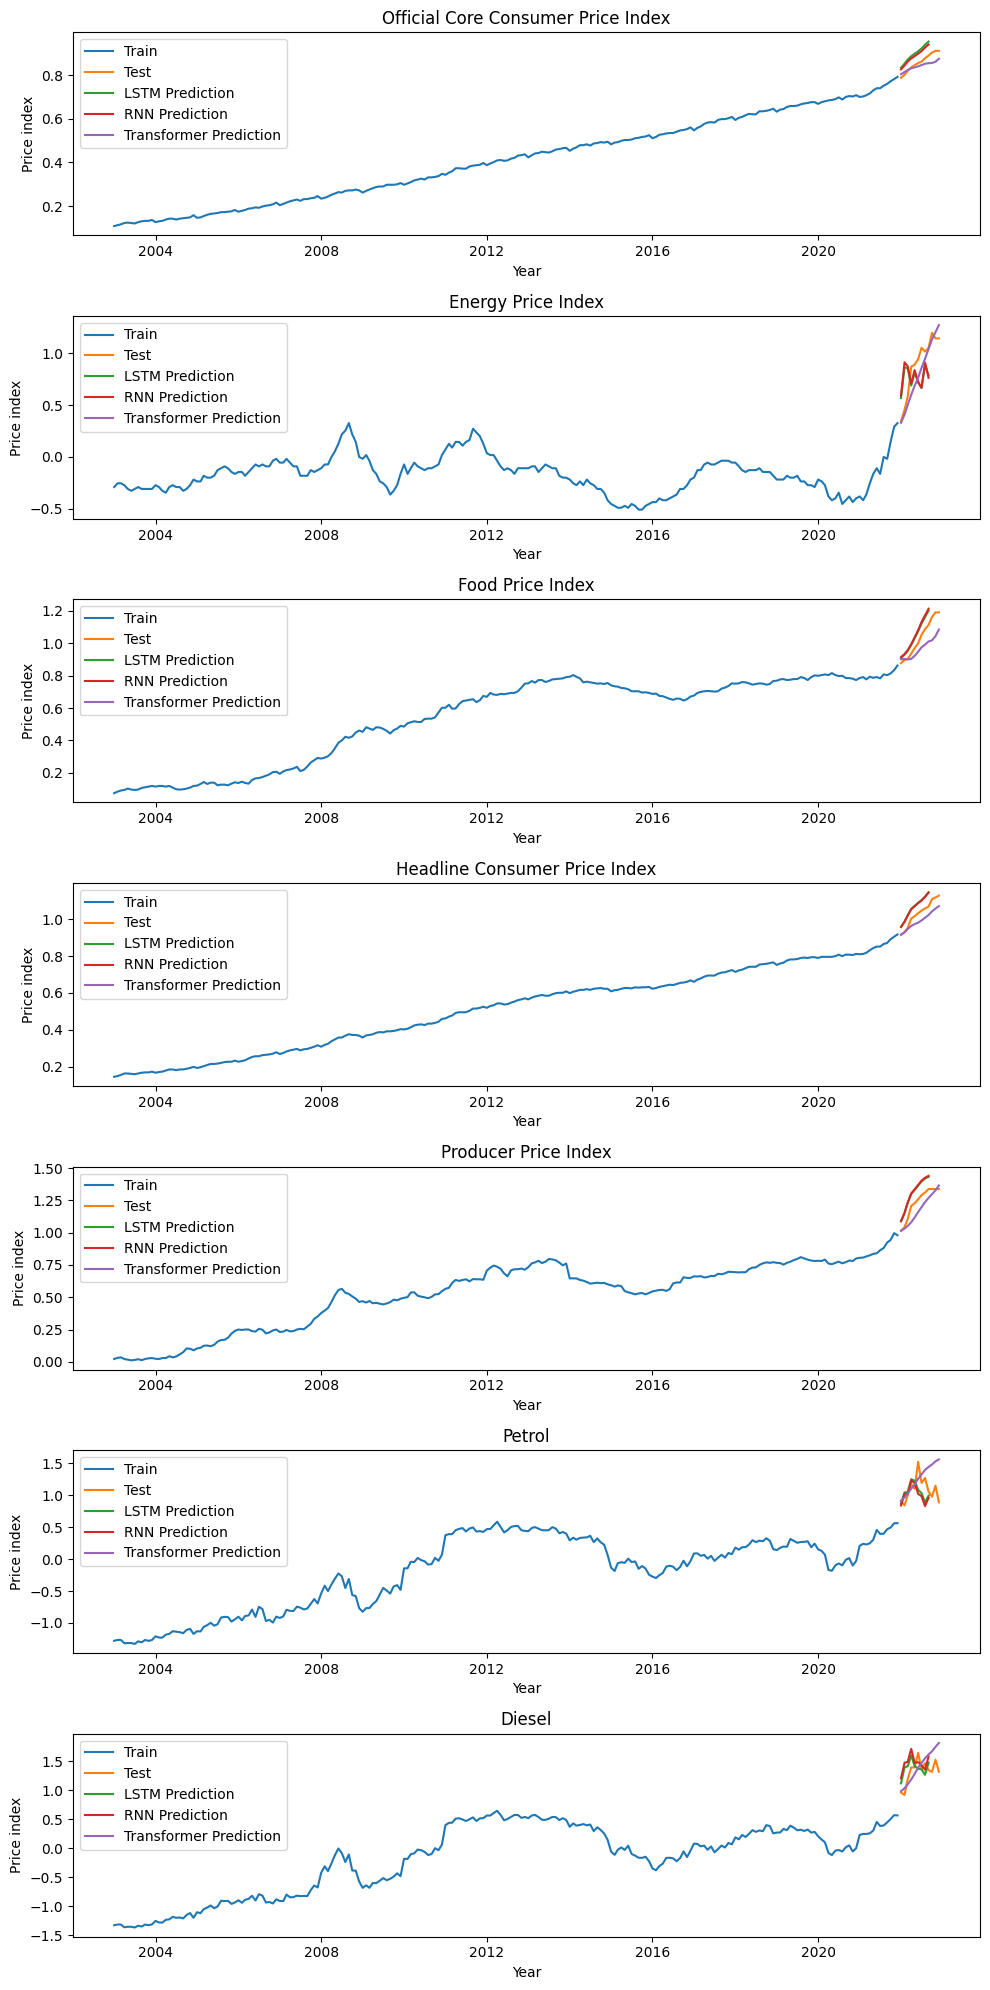

In [61]:
# merge the three dataframes on the index
merged_df = pd.concat([lstmTrainDF, lstmTestDF,lstmResultDF, rnnResultDF, transformerResultDF],axis=1)
merged_df
# plot the train, test, and prediction values


fig,axes = plt.subplots(7,1,figsize=(10,20),)

for i,col in enumerate(['Official Core Consumer Price Index','Energy Price Index','Food Price Index','Headline Consumer Price Index','Producer Price Index','Petrol','Diesel']):
    axes[i].plot(merged_df.index, merged_df[f"{col} Train"], label='Train')
    axes[i].plot(merged_df.index, merged_df[f"{col} Test"], label='Test')
    axes[i].plot(merged_df.index, merged_df[f"{col} LSTM Prediction"], label='LSTM Prediction')
    axes[i].plot(merged_df.index, merged_df[f"{col} RNN Prediction"], label='RNN Prediction')
    axes[i].plot(merged_df.index, merged_df[f"{col} Transformer Prediction"].add(dataGreaterthan2003[col][-12]), label='Transformer Prediction')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Price index')
    axes[i].set_title(col)
    axes[i].legend()

fig.tight_layout()
plt.show()

In [27]:
merged_results = pd.merge(pd.DataFrame(lstm_result_dict).T, pd.DataFrame(rnn_result_dict).T, left_index=True, right_index=True, suffixes=('_lstm', '_rnn'))

In [28]:
merged_results = pd.merge(merged_results, pd.DataFrame(transformer_result_dict).T, left_index=True, right_index=True)

In [29]:
merged_results = merged_results.rename(columns={'learning_rate': 'learning_rate_transformer','epochs':'epochs_transformer','loss':'loss_transformer'})

In [30]:
merged_results

,learning_rate_lstm,epochs_lstm,loss_lstm,learning_rate_rnn,epochs_rnn,loss_rnn,learning_rate_transformer,epochs_transformer,loss_transformer
Official Core Consumer Price Index,0.001,100.0,0.000143,0.100,50.0,0.000309,0.001,50.0,0.004174
Energy Price Index,0.010,50.0,0.084357,0.010,100.0,0.013383,0.001,50.0,0.032309
Food Price Index,0.001,100.0,0.001658,0.010,150.0,0.006364,0.001,50.0,0.001068
Headline Consumer Price Index,0.001,150.0,0.000513,0.001,100.0,0.002154,0.001,50.0,0.002513
Producer Price Index,0.001,50.0,0.004538,0.010,150.0,0.007196,0.001,50.0,0.026743
Petrol,0.010,50.0,0.043645,0.001,150.0,0.038774,0.001,50.0,0.013507
Diesel,0.010,100.0,0.033494,0.001,100.0,0.030592,0.001,50.0,0.032741


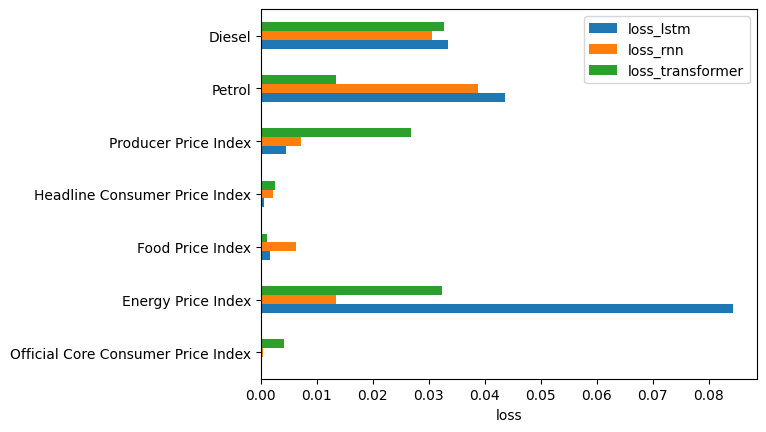

In [31]:
merged_results.plot.barh(y=['loss_lstm', 'loss_rnn','loss_transformer'], rot=0)
plt.xlabel('loss')
plt.show()

#### Metrics Evaluation

In [32]:
metrics_exponential_smoothing_raw = pd.read_csv('metrics_exponential_smoothing.csv').set_index('Unnamed: 0')
metrics_autoregressive_raw = pd.read_csv('metrics_autoregressive.csv').set_index('Unnamed: 0')
metrics_movingaverage_raw = pd.read_csv('metrics_movingaverage.csv').set_index('Unnamed: 0')
metrics_arima_raw = pd.read_csv('metrics_arima.csv').set_index('Unnamed: 0')
metrics_sarima_raw = pd.read_csv('metrics_sarima.csv').set_index('Unnamed: 0')
metrics_rnn_raw = pd.read_csv('metrics_rnn.csv').set_index('Unnamed: 0')
metrics_lstm_raw = pd.read_csv('metrics_lstm.csv').set_index('Unnamed: 0')
metrics_transformer_raw = pd.read_csv('metrics_transformer.csv').set_index('Unnamed: 0')

In [33]:
metrics_exponential_smoothing = metrics_exponential_smoothing_raw.add_prefix('es_')
metrics_autoregressive = metrics_autoregressive_raw.add_prefix('ar_')
metrics_movingaverage = metrics_movingaverage_raw.add_prefix('ma_')
metrics_arima = metrics_arima_raw.add_prefix('arima_')
metrics_sarima = metrics_sarima_raw.add_prefix('sarima_')
metrics_rnn = metrics_rnn_raw.add_prefix('rnn_')
metrics_lstm = metrics_lstm_raw.add_prefix('lstm_')
metrics_transformer = metrics_transformer_raw.add_prefix('transformer_')

In [34]:
metrics = pd.concat([metrics_exponential_smoothing, metrics_autoregressive, metrics_movingaverage, metrics_arima, metrics_sarima, metrics_rnn, metrics_lstm, metrics_transformer], axis = 1)

In [35]:
metrics_mse = metrics.filter(like='mse')

In [36]:
metrics_mse

,es_mse,ar_mse,ma_mse,arima_mse,sarima_mse,rnn_mse,lstm_mse,transformer_mse
Unnamed: 0,,,,,,,,
Official Core Consumer Price Index,0.000096,0.000009,0.000011,0.000024,0.000044,0.000965,0.002309,0.651006
Energy Price Index,0.030024,0.003356,0.001804,0.002776,0.017263,0.035220,0.057820,0.192494
Food Price Index,0.009330,0.000165,0.000160,0.000126,0.001939,0.000311,0.005515,0.890037
Headline Consumer Price Index,0.001157,0.000025,0.000023,0.000037,0.001081,0.000199,0.004212,0.913272
Producer Price Index,0.022400,0.000602,0.000484,0.000499,0.035611,0.002443,0.013291,1.147281
Petrol,0.063680,0.011089,0.007009,0.003899,0.148433,0.042213,0.048343,0.608553
Diesel,0.155526,0.009291,0.007387,0.004537,0.308375,0.030770,0.053394,0.815010


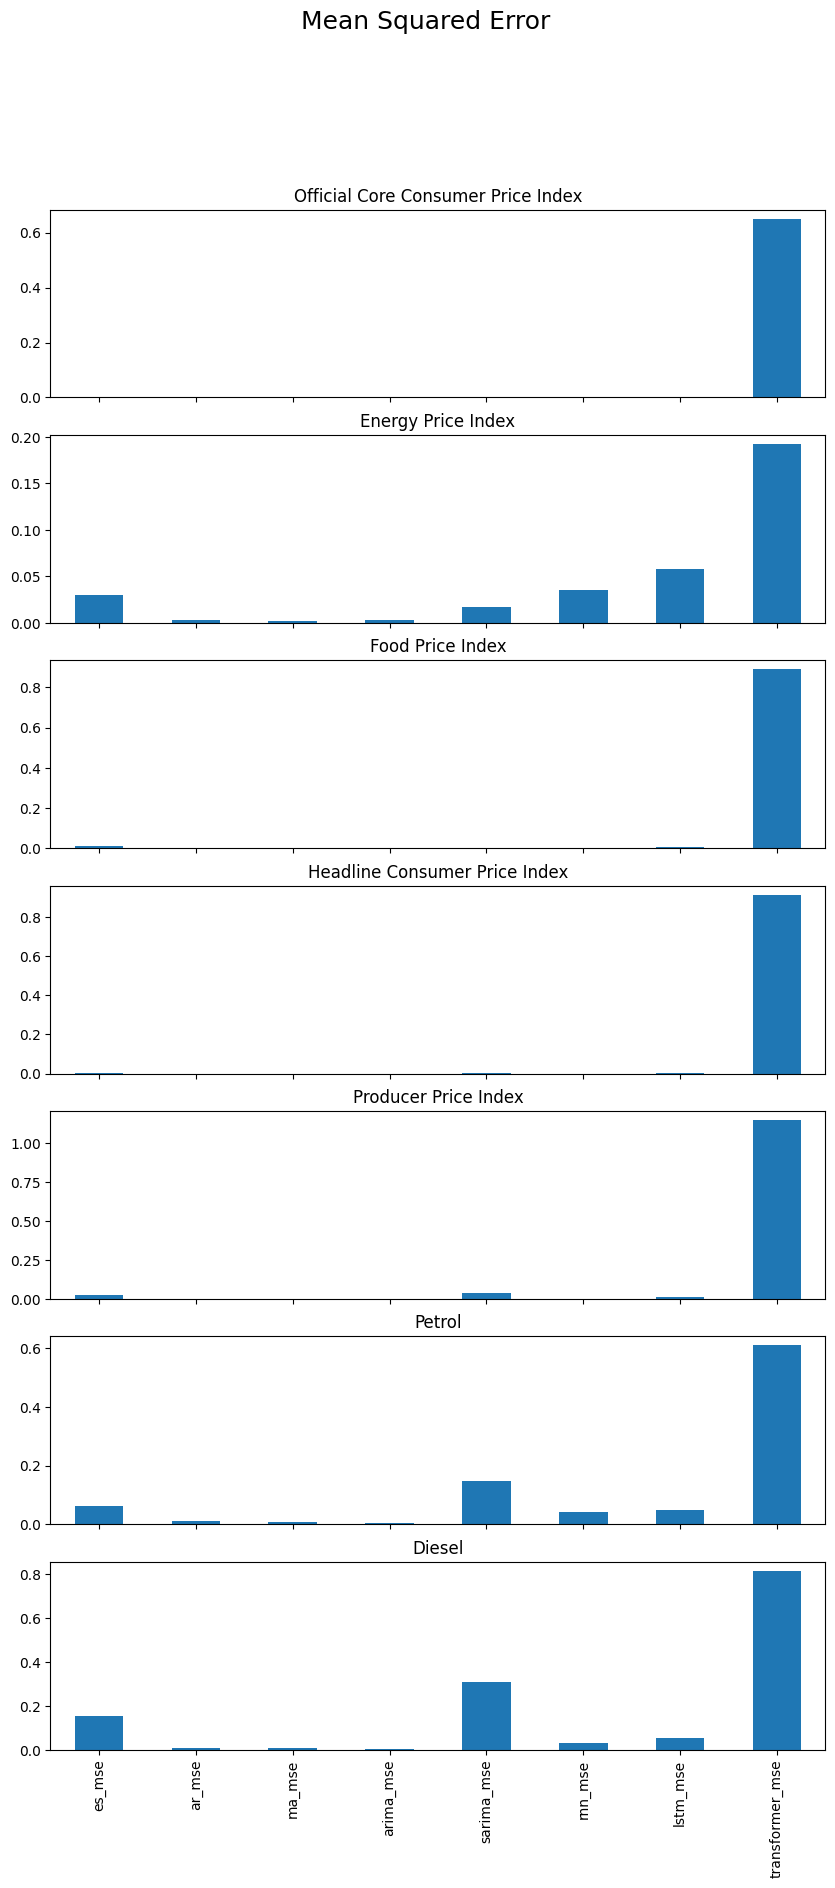

In [37]:
fig, axes = plt.subplots(nrows=len(metrics_mse.index), ncols=1, sharex=True, figsize=(10,20),)

for i, (index, row) in enumerate(metrics_mse.iterrows()):
    ax = axes[i]
    row.plot(kind='bar', ax=ax)
    ax.set_title(index)

fig.suptitle('Mean Squared Error', fontsize=18)

plt.show()

In [38]:
metrics_mae = metrics.filter(like='mae')

In [39]:
metrics_mae

,es_mae,ar_mae,ma_mae,arima_mae,sarima_mae,rnn_mae,lstm_mae,transformer_mae
Unnamed: 0,,,,,,,,
Official Core Consumer Price Index,0.008369,0.002193,0.002969,0.003882,0.005397,0.029416,0.047818,0.806568
Energy Price Index,0.133593,0.048757,0.036826,0.040249,0.109082,0.139950,0.209116,0.424369
Food Price Index,0.075529,0.010102,0.011055,0.008521,0.034052,0.012906,0.070768,0.941855
Headline Consumer Price Index,0.029805,0.004451,0.004159,0.004875,0.030201,0.009902,0.064096,0.955392
Producer Price Index,0.134618,0.021471,0.019372,0.018873,0.172047,0.041622,0.114225,1.070107
Petrol,0.221493,0.082573,0.068032,0.046721,0.336309,0.181015,0.162542,0.737962
Diesel,0.361407,0.084541,0.077209,0.058045,0.530932,0.142430,0.188417,0.876095


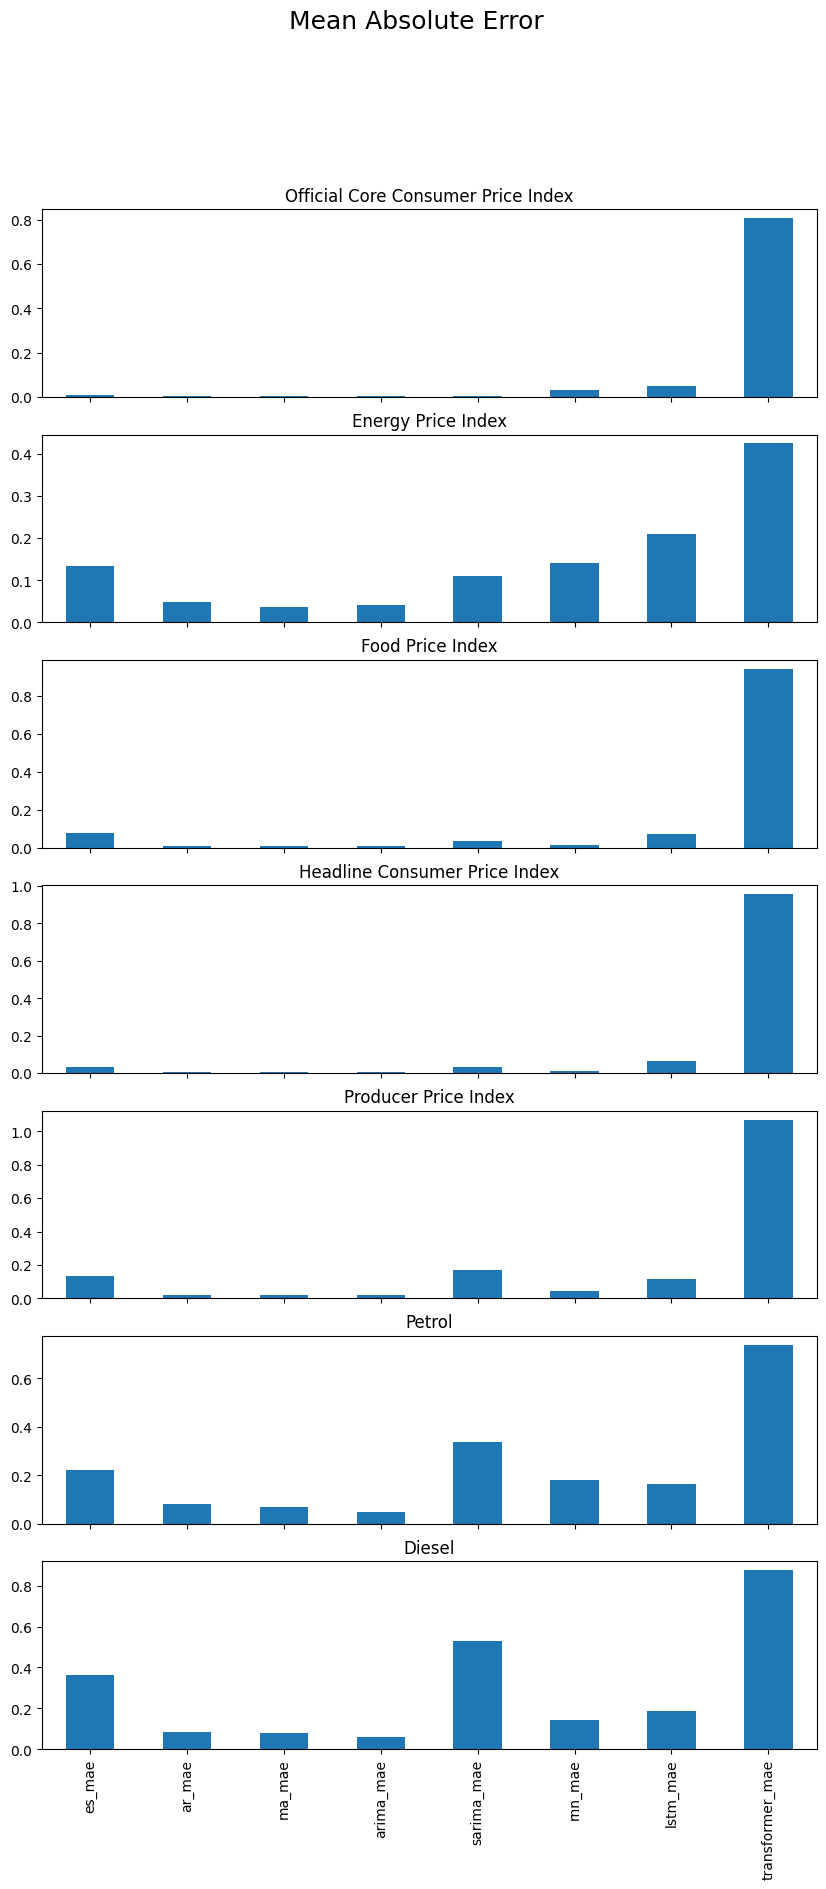

In [40]:
fig, axes = plt.subplots(nrows=len(metrics_mae.index), ncols=1, sharex=True, figsize=(10,20),)

for i, (index, row) in enumerate(metrics_mae.iterrows()):
    ax = axes[i]
    row.plot(kind='bar', ax=ax)
    ax.set_title(index)

fig.suptitle('Mean Absolute Error', fontsize=18)

plt.show()

In [41]:
metrics_aic = metrics.filter(like='aic')

In [42]:
metrics_aic

,es_aic,ar_aic,ma_aic,arima_aic,sarima_aic,rnn_aic,lstm_aic,transformer_aic
Unnamed: 0,,,,,,,,
Official Core Consumer Price Index,-2555.226191,18.136194,-1999.892993,-2092.574586,-1612.214247,12817.827720,50809.061241,-9082.761963
Energy Price Index,-1350.249378,19.553948,-1130.599026,-919.911564,-726.914090,12835.064728,50859.163922,-148.650261
Food Price Index,-2045.197899,18.571377,-1731.433847,-1599.757527,-1364.070884,12827.207589,50822.327247,-2082.264374
Headline Consumer Price Index,-2511.410965,18.216097,-2138.247332,-1996.463690,-1660.745168,12814.956478,50814.859816,-12186.282587
Producer Price Index,-1785.957884,18.917225,-1488.291929,-1329.126981,-1153.163378,12824.861701,50836.309395,-1174.077553
Petrol,-1118.119150,19.900562,-950.183112,-764.586951,-472.066779,12839.960119,50856.380145,-32.078073
Diesel,-1127.731777,19.901654,-928.959609,-766.312966,-483.573172,12836.907645,50852.456578,-54.515728


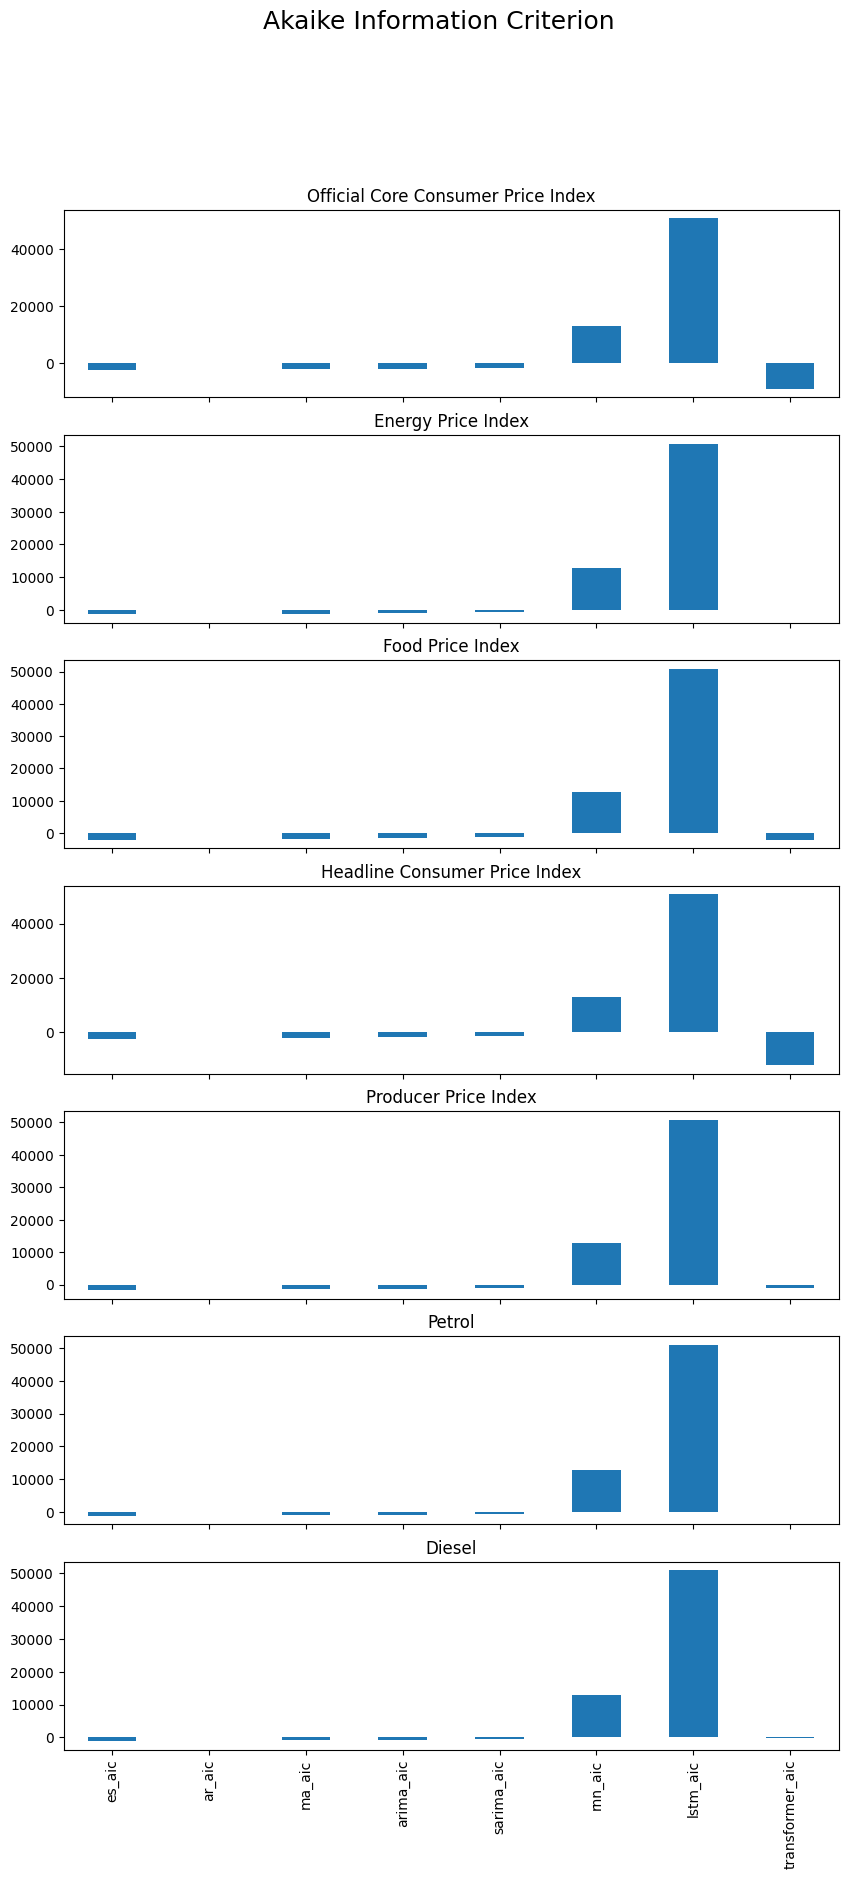

In [43]:
fig, axes = plt.subplots(nrows=len(metrics_aic.index), ncols=1, sharex=True, figsize=(10,20),)

for i, (index, row) in enumerate(metrics_aic.iterrows()):
    ax = axes[i]
    row.plot(kind='bar', ax=ax)
    ax.set_title(index)

fig.suptitle('Akaike Information Criterion', fontsize=18)

plt.show()

In [44]:
metrics_bic = metrics.filter(like='bic')

In [45]:
metrics_bic

,es_bic,ar_bic,ma_bic,arima_bic,sarima_bic,rnn_bic,lstm_bic,transformer_bic
Unnamed: 0,,,,,,,,
Official Core Consumer Price Index,-2500.356661,70.989072,-1943.736810,-2082.679634,-1601.952642,21.913296,27.416958,-9076.943083
Energy Price Index,-1295.379847,72.406827,-1074.442843,-910.016612,-716.652485,18.082850,16.283029,-142.831382
Food Price Index,-1990.328369,71.424256,-1675.277664,-1589.862575,-1353.809279,19.828881,24.468957,-2076.445494
Headline Consumer Price Index,-2456.541435,71.068975,-2082.091148,-1986.568737,-1650.483563,22.551350,26.128386,-12180.463707
Producer Price Index,-1731.088354,71.770103,-1432.135745,-1319.232029,-1142.901773,20.350189,21.361813,-1168.258674
Petrol,-1063.249620,72.753441,-894.026928,-754.691999,-461.805174,16.994985,16.901646,-26.259194
Diesel,-1072.862247,72.754532,-872.803425,-756.418014,-473.311567,17.673313,17.773550,-48.696849


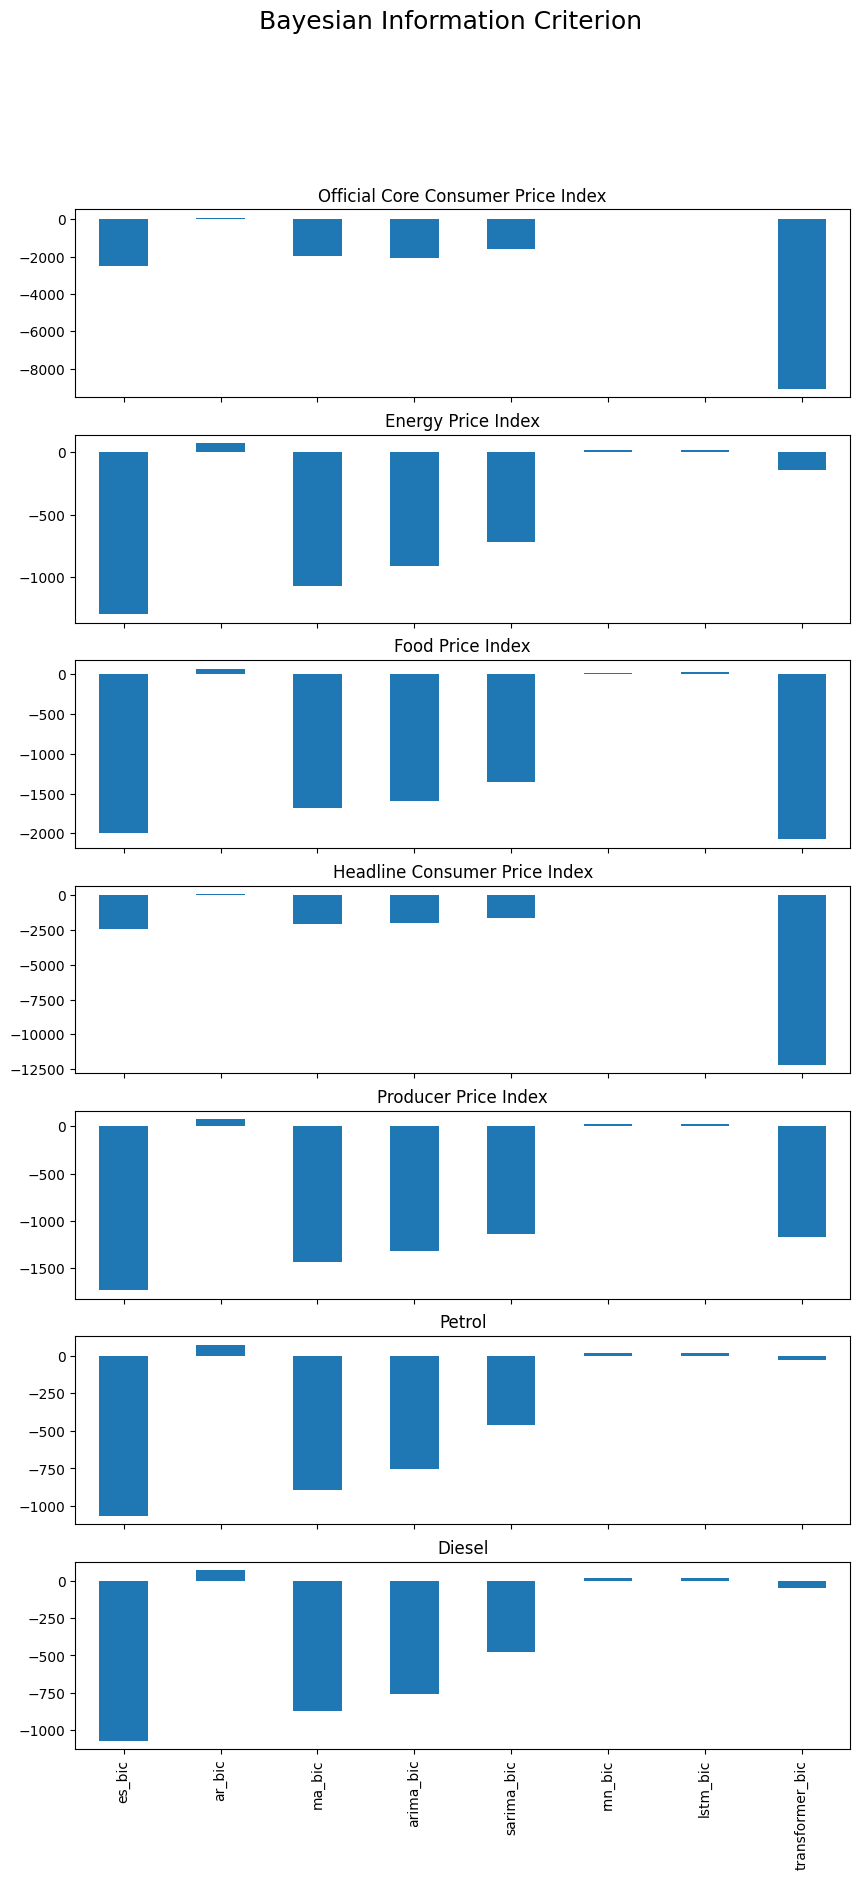

In [46]:
fig, axes = plt.subplots(nrows=len(metrics_bic.index), ncols=1, sharex=True, figsize=(10,20),)

for i, (index, row) in enumerate(metrics_bic.iterrows()):
    ax = axes[i]
    row.plot(kind='bar', ax=ax)
    ax.set_title(index)

fig.suptitle('Bayesian Information Criterion', fontsize=18)

plt.show()

#### Metrics Evaluation by index

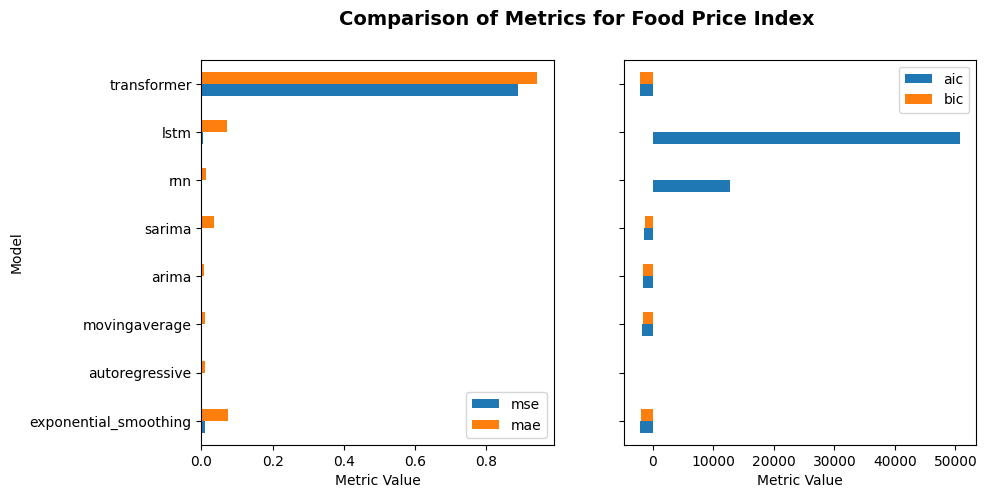

In [47]:
food_price_index = pd.concat([metrics_exponential_smoothing_raw.loc[['Food Price Index']],
            metrics_autoregressive_raw.loc[['Food Price Index']],
            metrics_movingaverage_raw.loc[['Food Price Index']],
            metrics_arima_raw.loc[['Food Price Index']],
            metrics_sarima_raw.loc[['Food Price Index']],
            metrics_rnn_raw.loc[['Food Price Index']],
            metrics_lstm_raw.loc[['Food Price Index']],
            metrics_transformer_raw.loc[['Food Price Index']]], axis = 0)
food_price_index.index = ['exponential_smoothing','autoregressive','movingaverage','arima','sarima','rnn','lstm','transformer']
fig, ax = plt.subplots(ncols=2, figsize=(10, 5), sharey=True)


food_price_index[['mse','mae']].plot(kind='barh', ax=ax[0])
food_price_index[['aic','bic']].plot(kind='barh', ax=ax[1])


ax[0].set_ylabel('Model')
ax[0].set_xlabel('Metric Value')

ax[1].set_ylabel('Model')
ax[1].set_xlabel('Metric Value')

fig.suptitle('Comparison of Metrics for Food Price Index', fontsize=14, fontweight='bold')


plt.show()

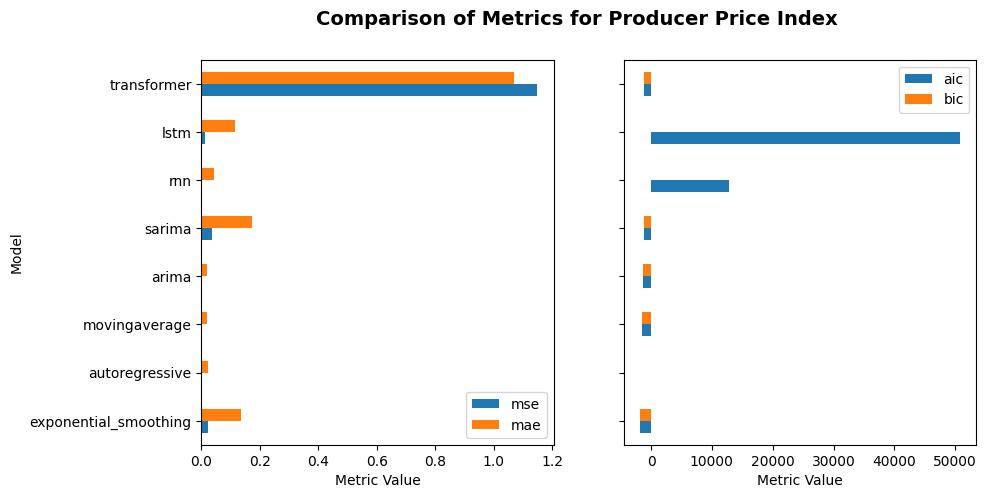

In [48]:
producer_price_index = pd.concat([metrics_exponential_smoothing_raw.loc[['Producer Price Index']],
            metrics_autoregressive_raw.loc[['Producer Price Index']],
            metrics_movingaverage_raw.loc[['Producer Price Index']],
            metrics_arima_raw.loc[['Producer Price Index']],
            metrics_sarima_raw.loc[['Producer Price Index']],
            metrics_rnn_raw.loc[['Producer Price Index']],
            metrics_lstm_raw.loc[['Producer Price Index']],
            metrics_transformer_raw.loc[['Producer Price Index']]], axis = 0)
producer_price_index.index = ['exponential_smoothing','autoregressive','movingaverage','arima','sarima','rnn','lstm','transformer']


fig, ax = plt.subplots(ncols=2, figsize=(10, 5), sharey=True)


producer_price_index[['mse','mae']].plot(kind='barh', ax=ax[0])
producer_price_index[['aic','bic']].plot(kind='barh', ax=ax[1])


ax[0].set_ylabel('Model')
ax[0].set_xlabel('Metric Value')

ax[1].set_ylabel('Model')
ax[1].set_xlabel('Metric Value')

fig.suptitle('Comparison of Metrics for Producer Price Index', fontsize=14, fontweight='bold')


plt.show()

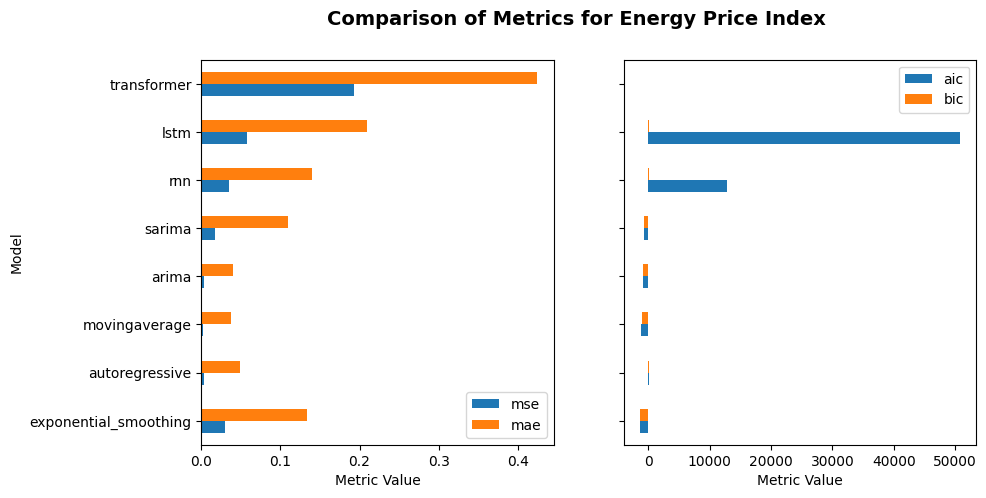

In [49]:
energy_price_index= pd.concat([metrics_exponential_smoothing_raw.loc[['Energy Price Index']],
            metrics_autoregressive_raw.loc[['Energy Price Index']],
            metrics_movingaverage_raw.loc[['Energy Price Index']],
            metrics_arima_raw.loc[['Energy Price Index']],
            metrics_sarima_raw.loc[['Energy Price Index']],
            metrics_rnn_raw.loc[['Energy Price Index']],
            metrics_lstm_raw.loc[['Energy Price Index']],
            metrics_transformer_raw.loc[['Energy Price Index']]], axis = 0)
energy_price_index.index = ['exponential_smoothing','autoregressive','movingaverage','arima','sarima','rnn','lstm','transformer']


fig, ax = plt.subplots(ncols=2, figsize=(10, 5), sharey=True)


energy_price_index[['mse','mae']].plot(kind='barh', ax=ax[0])
energy_price_index[['aic','bic']].plot(kind='barh', ax=ax[1])


ax[0].set_ylabel('Model')
ax[0].set_xlabel('Metric Value')

ax[1].set_ylabel('Model')
ax[1].set_xlabel('Metric Value')

fig.suptitle('Comparison of Metrics for Energy Price Index', fontsize=14, fontweight='bold')


plt.show()

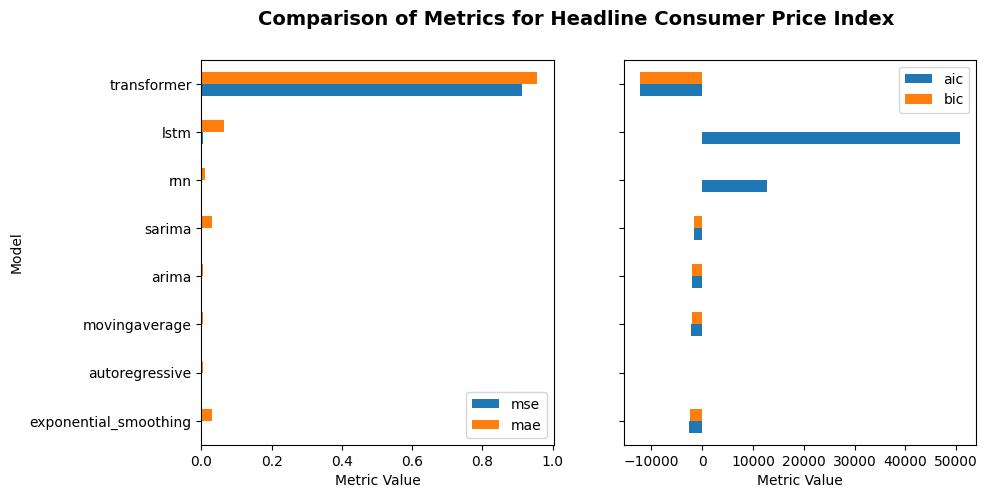

In [50]:
headlinel_consumer_price_index= pd.concat([metrics_exponential_smoothing_raw.loc[['Headline Consumer Price Index']],
            metrics_autoregressive_raw.loc[['Headline Consumer Price Index']],
            metrics_movingaverage_raw.loc[['Headline Consumer Price Index']],
            metrics_arima_raw.loc[['Headline Consumer Price Index']],
            metrics_sarima_raw.loc[['Headline Consumer Price Index']],
            metrics_rnn_raw.loc[['Headline Consumer Price Index']],
            metrics_lstm_raw.loc[['Headline Consumer Price Index']],
            metrics_transformer_raw.loc[['Headline Consumer Price Index']]], axis = 0)
headlinel_consumer_price_index.index = ['exponential_smoothing','autoregressive','movingaverage','arima','sarima','rnn','lstm','transformer']
fig, ax = plt.subplots(ncols=2, figsize=(10, 5), sharey=True)


headlinel_consumer_price_index[['mse','mae']].plot(kind='barh', ax=ax[0])
headlinel_consumer_price_index[['aic','bic']].plot(kind='barh', ax=ax[1])


ax[0].set_ylabel('Model')
ax[0].set_xlabel('Metric Value')

ax[1].set_ylabel('Model')
ax[1].set_xlabel('Metric Value')

fig.suptitle('Comparison of Metrics for Headline Consumer Price Index', fontsize=14, fontweight='bold')


plt.show()

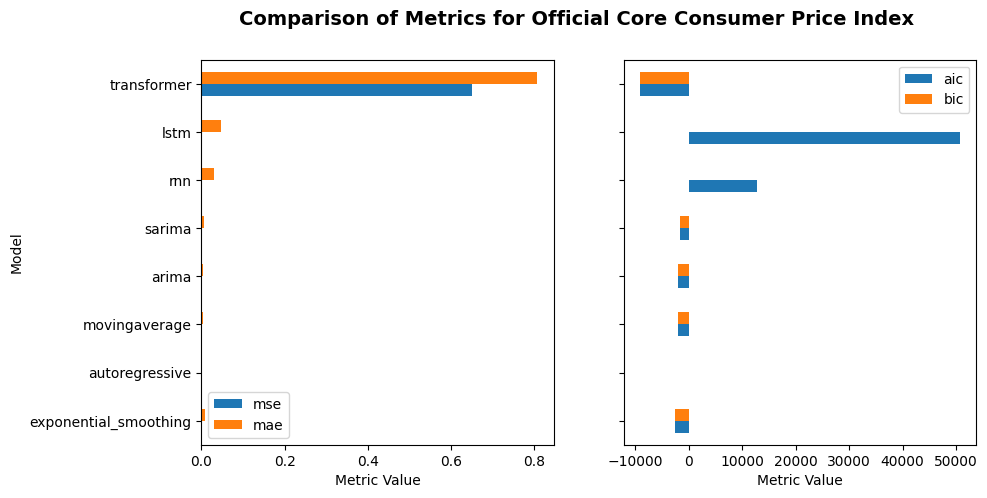

In [51]:
official_core_consumer_price_index= pd.concat([metrics_exponential_smoothing_raw.loc[['Official Core Consumer Price Index']],
            metrics_autoregressive_raw.loc[['Official Core Consumer Price Index']],
            metrics_movingaverage_raw.loc[['Official Core Consumer Price Index']],
            metrics_arima_raw.loc[['Official Core Consumer Price Index']],
            metrics_sarima_raw.loc[['Official Core Consumer Price Index']],
            metrics_rnn_raw.loc[['Official Core Consumer Price Index']],
            metrics_lstm_raw.loc[['Official Core Consumer Price Index']],
            metrics_transformer_raw.loc[['Official Core Consumer Price Index']]], axis = 0)
official_core_consumer_price_index.index = ['exponential_smoothing','autoregressive','movingaverage','arima','sarima','rnn','lstm','transformer']
fig, ax = plt.subplots(ncols=2, figsize=(10, 5), sharey=True)


official_core_consumer_price_index[['mse','mae']].plot(kind='barh', ax=ax[0])
official_core_consumer_price_index[['aic','bic']].plot(kind='barh', ax=ax[1])


ax[0].set_ylabel('Model')
ax[0].set_xlabel('Metric Value')

ax[1].set_ylabel('Model')
ax[1].set_xlabel('Metric Value')

fig.suptitle('Comparison of Metrics for Official Core Consumer Price Index', fontsize=14, fontweight='bold')


plt.show()

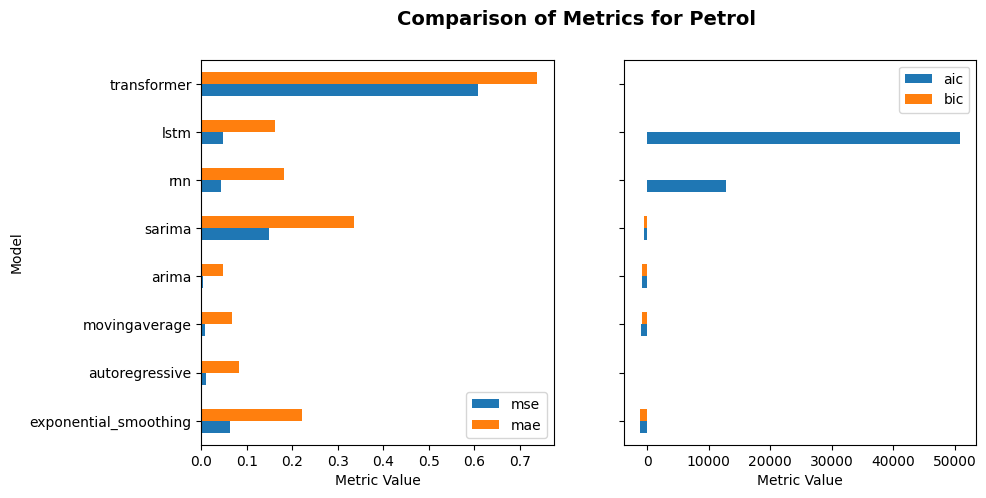

In [52]:
petrol= pd.concat([metrics_exponential_smoothing_raw.loc[['Petrol']],
            metrics_autoregressive_raw.loc[['Petrol']],
            metrics_movingaverage_raw.loc[['Petrol']],
            metrics_arima_raw.loc[['Petrol']],
            metrics_sarima_raw.loc[['Petrol']],
            metrics_rnn_raw.loc[['Petrol']],
            metrics_lstm_raw.loc[['Petrol']],
            metrics_transformer_raw.loc[['Petrol']]], axis = 0)
petrol.index = ['exponential_smoothing','autoregressive','movingaverage','arima','sarima','rnn','lstm','transformer']
fig, ax = plt.subplots(ncols=2, figsize=(10, 5), sharey=True)


petrol[['mse','mae']].plot(kind='barh', ax=ax[0])
petrol[['aic','bic']].plot(kind='barh', ax=ax[1])


ax[0].set_ylabel('Model')
ax[0].set_xlabel('Metric Value')

ax[1].set_ylabel('Model')
ax[1].set_xlabel('Metric Value')

fig.suptitle('Comparison of Metrics for Petrol', fontsize=14, fontweight='bold')


plt.show()

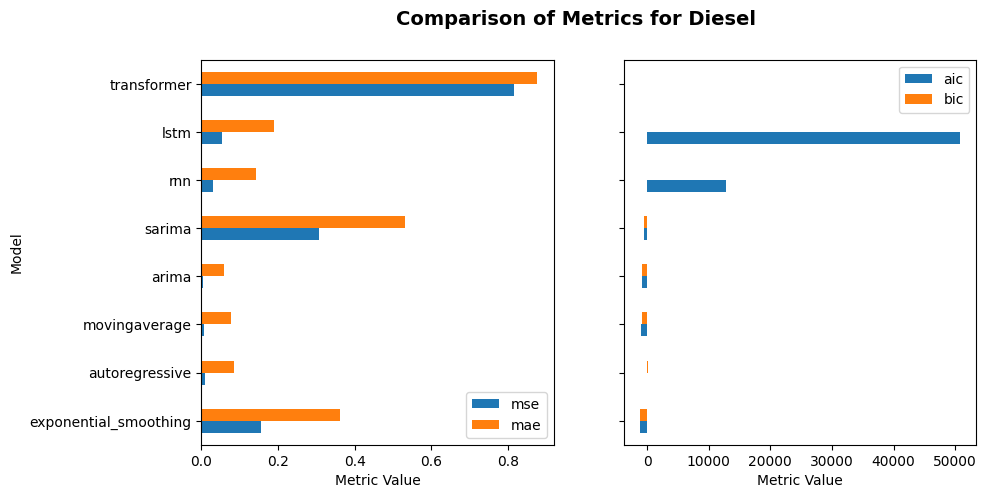

In [53]:
diesel= pd.concat([metrics_exponential_smoothing_raw.loc[['Diesel']],
            metrics_autoregressive_raw.loc[['Diesel']],
            metrics_movingaverage_raw.loc[['Diesel']],
            metrics_arima_raw.loc[['Diesel']],
            metrics_sarima_raw.loc[['Diesel']],
            metrics_rnn_raw.loc[['Diesel']],
            metrics_lstm_raw.loc[['Diesel']],
            metrics_transformer_raw.loc[['Diesel']]], axis = 0)
diesel.index = ['exponential_smoothing','autoregressive','movingaverage','arima','sarima','rnn','lstm','transformer']
fig, ax = plt.subplots(ncols=2, figsize=(10, 5), sharey=True)


diesel[['mse','mae']].plot(kind='barh', ax=ax[0])
diesel[['aic','bic']].plot(kind='barh', ax=ax[1])


ax[0].set_ylabel('Model')
ax[0].set_xlabel('Metric Value')

ax[1].set_ylabel('Model')
ax[1].set_xlabel('Metric Value')

fig.suptitle('Comparison of Metrics for Diesel', fontsize=14, fontweight='bold')
plt.show()

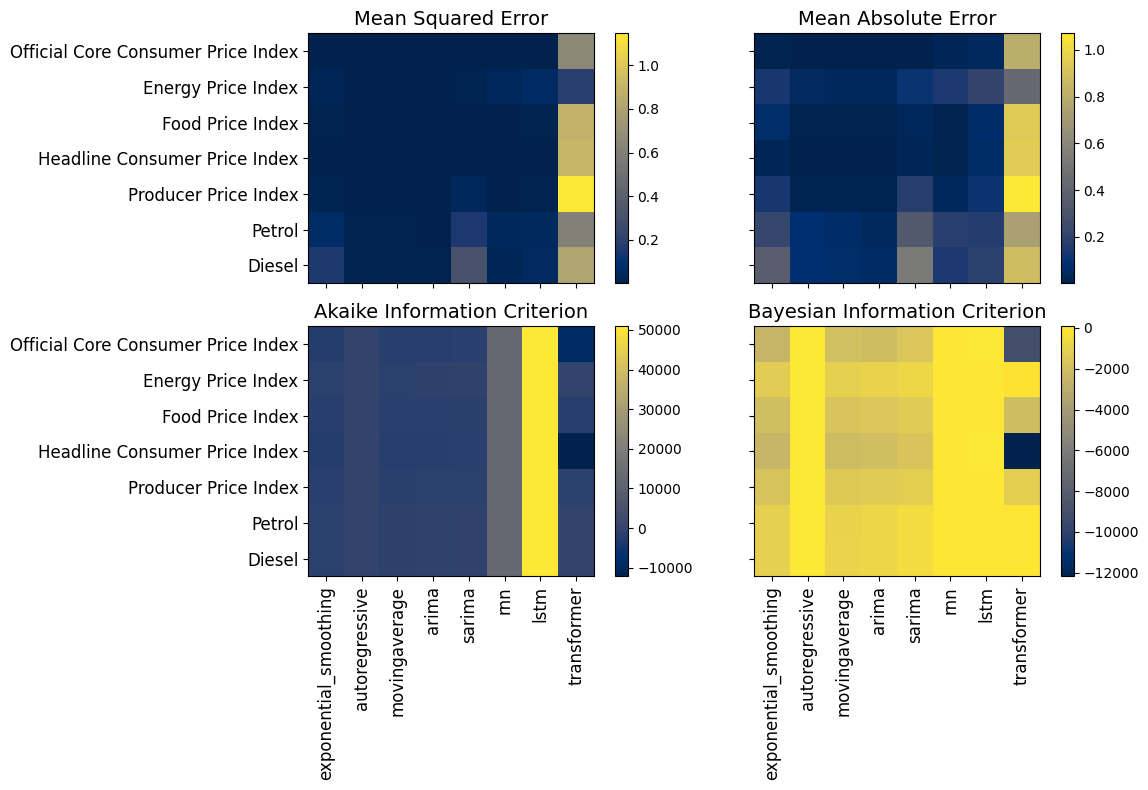

In [55]:


models = metrics.index
indices = ['exponential_smoothing','autoregressive','movingaverage','arima','sarima','rnn','lstm','transformer']
mse = metrics_mse.to_numpy()
mae = metrics_mae.to_numpy()
aic = metrics_aic.to_numpy()
bic = metrics_bic.to_numpy()

fig, axs = plt.subplots(2, 2, figsize=(12, 8), sharex=True, sharey=True)

im1 = axs[0, 0].imshow(mse, cmap='cividis')
axs[0, 0].set_xticks(np.arange(len(indices)))
axs[0, 0].set_yticks(np.arange(len(models)))
axs[0, 0].set_xticklabels(indices, fontsize=12, rotation=90)
axs[0, 0].set_yticklabels(models, fontsize=12)
axs[0, 0].set_title('Mean Squared Error', fontsize=14)
fig.colorbar(im1, ax=axs[0, 0])

im2 = axs[0, 1].imshow(mae, cmap='cividis')
axs[0, 1].set_xticks(np.arange(len(indices)))
axs[0, 1].set_yticks(np.arange(len(models)))
axs[0, 1].set_xticklabels(indices, fontsize=12, rotation=90)
axs[0, 1].set_yticklabels(models, fontsize=12)
axs[0, 1].set_title('Mean Absolute Error', fontsize=14)
fig.colorbar(im2, ax=axs[0, 1])

im3 = axs[1, 0].imshow(aic, cmap='cividis')
axs[1, 0].set_xticks(np.arange(len(indices)))
axs[1, 0].set_yticks(np.arange(len(models)))
axs[1, 0].set_xticklabels(indices, fontsize=12, rotation=90)
axs[1, 0].set_yticklabels(models, fontsize=12)
axs[1, 0].set_title('Akaike Information Criterion', fontsize=14)
fig.colorbar(im3, ax=axs[1, 0])

im4 = axs[1, 1].imshow(bic, cmap='cividis')
axs[1, 1].set_xticks(np.arange(len(indices)))
axs[1, 1].set_yticks(np.arange(len(models)))
axs[1, 1].set_xticklabels(indices, fontsize=12, rotation=90)
axs[1, 1].set_yticklabels(models, fontsize=12)
axs[1, 1].set_title('Bayesian Information Criterion', fontsize=14)
fig.colorbar(im4, ax=axs[1, 1])

plt.tight_layout()

plt.show()


In [56]:
transformer_future_predictions = pd.read_csv('multivariate_future_prediction_transformer.csv')
transformer_future_predictions['Unnamed: 0'] = pd.to_datetime(transformer_future_predictions['Unnamed: 0'])
transformer_future_predictions.set_index('Unnamed: 0', inplace=True)

In [57]:
df = pd.DataFrame(transformer_future_predictions)

# create the RobustScaler object
scaler = RobustScaler()

# fit and transform the dataframe using the scaler object
scaled_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# print the scaled dataframe
scaled_df.index = transformer_future_predictions.index

In [58]:
rnn_future_predictions = pd.read_csv('multivariate_future_prediction_rnn.csv')
rnn_future_predictions['Unnamed: 0'] = pd.to_datetime(rnn_future_predictions['Unnamed: 0'])
rnn_future_predictions.set_index('Unnamed: 0', inplace=True)

In [59]:
lstm_future_predictions = pd.read_csv('multivariate_future_prediction_lstm.csv')
lstm_future_predictions['Unnamed: 0'] = pd.to_datetime(lstm_future_predictions['Unnamed: 0'])
lstm_future_predictions.set_index('Unnamed: 0', inplace=True)

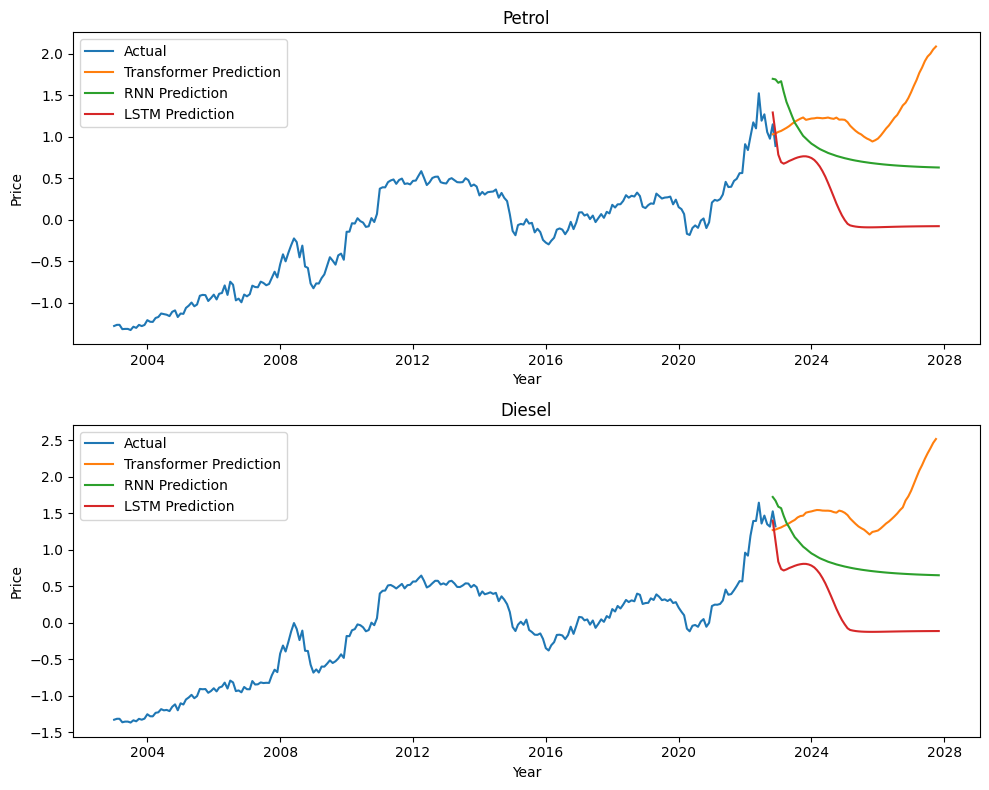

In [60]:
fig,axes = plt.subplots(2,1,figsize=(10,8),)

for i,col in enumerate(['Petrol','Diesel']):
    axes[i].plot(dataGreaterthan2003.index, dataGreaterthan2003[col], label='Actual')
    axes[i].plot(transformer_future_predictions.index, transformer_future_predictions[col].add(transformer_future_predictions[col][-1]), label='Transformer Prediction')
    axes[i].plot(rnn_future_predictions.index, rnn_future_predictions[col], label='RNN Prediction')
    axes[i].plot(lstm_future_predictions.index, lstm_future_predictions[col], label='LSTM Prediction') 
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Price')
    axes[i].set_title(col)
    axes[i].legend()

fig.tight_layout()
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=638889fe-2546-41ac-8d2f-f9d8b29d307c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>